# Testing the measure with a Pairwise graph as a 3-Hypergraph

In [4]:
import numpy as np
import xgi
import networkx as nx
import copy
from collections import OrderedDict
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy.stats import kendalltau

from hyperfunctions import *

In [5]:
def G_to_dict(G):
    '''
    Prepare the Networkx Graph for the Hypernetx package
    '''
    
    Gdict = {}
    
    for i, edge in enumerate(G.edges):
        Gdict['edge' + str(i)] = list(edge)
    
    return Gdict

In [27]:
samples = 20

## Erdös-Renyi

In [28]:
kentau_list = {}

for n in np.arange(10,300,10):
    
    if n % 100 == 0:
        print(n)
    
    kentaus = []
    
    for _ in range(samples):
        
        # Random graph to hypergraph 
        G = nx.erdos_renyi_graph(n, p=np.log(n)/n)
        
        while not nx.is_connected(G):
            G = nx.erdos_renyi_graph(n, p=np.log(n)/n)
        
        # To hypergraph, and 3-uniformize
        edgedict = G_to_dict(G)
        H = xgi.Hypergraph(edgedict)
        H3 = uniformize(H, m=3)
        
        # Compute the standard EC and the HEC
        EIG = list(nx.eigenvector_centrality_numpy(G).values())
        HEC = xgi.HEC_centrality(H3)
        HEC.pop('*')
        HEC = list(OrderedDict(sorted(HEC.items())).values()) # Ordered list
        
        KT = kendalltau(EIG, HEC)
        
        kentaus.append(KT.statistic)

    kentau_list[n] = np.mean(kentaus)

100
200


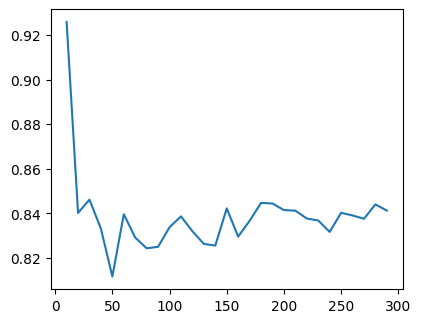

In [30]:
fig = plt.figure(figsize=(10,8))

ax1 = fig.add_subplot(221)

ax1.plot(kentau_list.keys(), kentau_list.values())

plt.show()

## Scale-free

In [31]:
kentau_list = {}

for n in np.arange(10,300,10):
    
    if n % 100 == 0:
        print(n)
    
    kentaus = []
    
    for _ in range(samples):
        
        # Random graph to hypergraph 
        G = nx.barabasi_albert_graph(n, 2)
        
        while not nx.is_connected(G):
            G = nx.barabasi_albert_graph(n, 2)
        
        # To hypergraph, and 3-uniformize
        edgedict = G_to_dict(G)
        H = xgi.Hypergraph(edgedict)
        H3 = uniformize(H, m=3)
        
        # Compute the standard EC and the HEC
        EIG = list(nx.eigenvector_centrality_numpy(G).values())
        HEC = xgi.HEC_centrality(H3)
        HEC.pop('*')
        HEC = list(OrderedDict(sorted(HEC.items())).values()) # Ordered list
        
        KT = kendalltau(EIG, HEC)
        
        kentaus.append(KT.statistic)

    kentau_list[n] = np.mean(kentaus)

100
200


[]

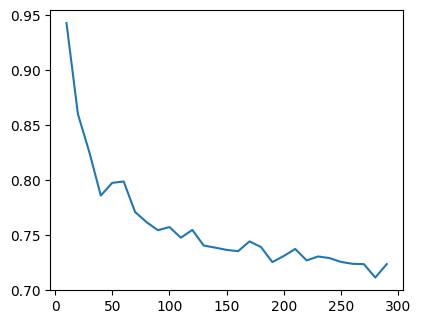

In [32]:
fig = plt.figure(figsize=(10,8))

ax1 = fig.add_subplot(221)

ax1.plot(kentau_list.keys(), kentau_list.values())

plt.plot()